#

# DiktyonPhi

## Vytváření orientovaného grafu

Prvním krokem při vytváření grafu je volání konstruktoru třídy `Graph`.

In [1]:
from diktyonphi import Graph, GraphType

In [2]:
g = Graph(GraphType.UNDIRECTED)

In [3]:
str(g)

'Graph(GraphType.UNDIRECTED, nodes: 0, edges: 0)'

In [4]:
g.add_edge(1, 2)
g.add_edge(2, 3)
g.add_edge(3, 1)
g.add_edge(3, 4)
g.add_node(5)

Node(5, {})

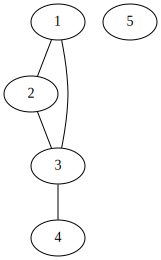

In [5]:
g

In [6]:
n6 = g.add_node(6)

In [7]:
n6

Node(6, {})

In [8]:
g.node(1).is_edge_to(n6)

False

In [9]:
g.node(1).connect_to(6)

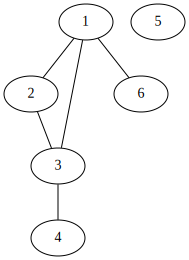

In [10]:
g

In [11]:
list(g.node(1).neighbor_ids)

[2, 3, 6]

In [12]:
g.node(1).to(6)

Edge(1→6, {})

In [13]:
n6.to(1)

Edge(6→1, {})

In [14]:
list(g.node(1).neighbor_ids)

[2, 3, 6]

In [15]:
list(g.node(6).neighbor_ids)

[1]

In [16]:
n6

Node(6, {})

In [17]:
g.node(6)

Node(6, {})

In [18]:
g.node(6).connect_to(1)

ValueError: Edge 6→1 already exists

In [ ]:
list(g.node(6).neighbor_ids)

[1]

In [ ]:
n6.is_edge_to(1)

False

In [ ]:
id(n6)

138093011645168

In [ ]:
id(g.node(6))

138093011645552

In [ ]:
n7 = g.add_node(7)

In [ ]:
id(n7)

138093011634416

In [ ]:
id(g.node(7))

138093014414304

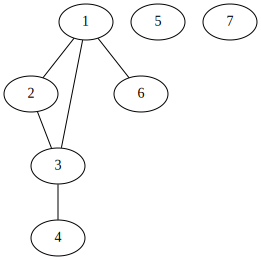

In [ ]:
g

In [ ]:
def dostupne_uzly(g, node_id, result)-> set:
    """
        id všech uzlů dostupných z uzlu node_id
    """
    for id in g.node(node_id).neighbor_ids:
        if id not in result:
            result.add(id)
            dostupne_uzly(g, id, result)


class Node_tracker:
    def __init__(self, g):
        self._g = g
        self._visited_nodes = set()


    def reachable_nodes(self, start_id):
        self._visited_nodes = set()
        return self._reachable_nodes(start_id)
        

    def _reachable_nodes(self, start_id):
        self._visited_nodes.add(start_id)
        for id in self._g.node(start_id).neighbor_ids:
            if id not in self._visited_nodes:
                self._visited_nodes.add(id)
                self._reachable_nodes(id)
        return set(self._visited_nodes)

    def components(self):
        nodes = set(self._g.node_ids())
        print(nodes)
        components = []
        while nodes:
            c = self.reachable_nodes(nodes.pop())
            components.append(c)
            nodes -= c
            
        return components
        
    
        

In [ ]:
result = set()
dostupne_uzly(g, 1, result)
print(result)

t = Node_tracker(g)
print(t.reachable_nodes(1))

print(t.reachable_nodes(5))

{1, 2, 3, 4, 6}
{1, 2, 3, 4, 6}
{5}


In [ ]:
list(g.node_ids())

[1, 2, 3, 4, 5, 6, 7]

In [ ]:
t = Node_tracker(g)


In [ ]:
t.components()

[{1, 2, 3, 4, 6}, {5}, {7}]

In [ ]:
g.add_edge(5, 7)

(Node(5, {}), Node(7, {}))

In [ ]:
t = Node_tracker(g)
t.components()

[{1, 2, 3, 4, 6}, {5, 7}]

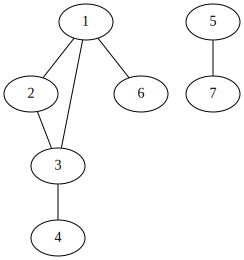

In [ ]:
g

In [20]:
from random import randint

def random_weighted_graph(node_count, edge_count):
    g = Graph(GraphType.UNDIRECTED)
    for i in range(node_count):
        g.add_node(i+1)

    while edge_count > 0:
        i = randint(1, node_count)
        j = randint(1, node_count)
        if i != j and not g.node(i).is_edge_to(j):
            g.add_edge(i, j, {"weight": randint(0, 25)})
            edge_count -= 1
    return g
        

In [23]:
bg = random_weighted_graph(100, 80)

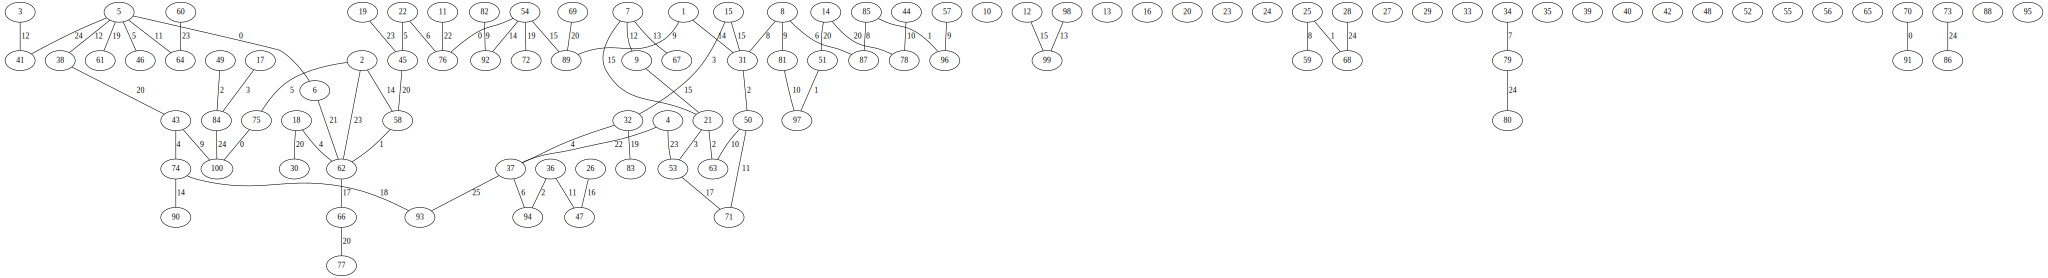

In [24]:
bg

In [ ]:
t = Node_tracker(bg)

In [ ]:
t.components()

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100}


[{1,
  2,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  14,
  15,
  17,
  19,
  20,
  21,
  24,
  26,
  27,
  28,
  29,
  30,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  48,
  49,
  50,
  53,
  54,
  57,
  59,
  62,
  65,
  66,
  67,
  70,
  72,
  73,
  75,
  76,
  78,
  81,
  82,
  84,
  86,
  87,
  88,
  90,
  91,
  92,
  99,
  100},
 {3},
 {13, 32, 63, 85, 96},
 {16, 51, 58, 79, 95},
 {18},
 {22, 71},
 {23},
 {25},
 {31},
 {33},
 {34, 68},
 {35},
 {44},
 {45},
 {46},
 {47, 80},
 {52},
 {55},
 {56, 94},
 {60, 98},
 {61},
 {64, 77},
 {69},
 {74},
 {83},
 {89},
 {93},
 {97}]